In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('ggplot')

In [4]:
import requests
import json

nyc_url='https://data.cityofnewyork.us/resource/h9gi-nx95.json'
response=requests.get(nyc_url)
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")

df.head()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,cross_street_name,location.latitude,location.longitude,location.human_address,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0,0,0,0,0,0,...,1211 LORING AVENUE,40.667202,-73.8665,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,NaN,40.683304,-73.917274,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   crash_date                     1000 non-null   object
 1   crash_time                     1000 non-null   object
 2   on_street_name                 742 non-null    object
 3   off_street_name                451 non-null    object
 4   number_of_persons_injured      1000 non-null   object
 5   number_of_persons_killed       1000 non-null   object
 6   number_of_pedestrians_injured  1000 non-null   object
 7   number_of_pedestrians_killed   1000 non-null   object
 8   number_of_cyclist_injured      1000 non-null   object
 9   number_of_cyclist_killed       1000 non-null   object
 10  number_of_motorist_injured     1000 non-null   object
 11  number_of_motorist_killed      1000 non-null   object
 12  contributing_factor_vehicle_1  997 non-null    object
 13  cont

In [6]:
nyc=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240204.csv')
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062758 entries, 0 to 2062757
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
drop_nyc=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 3'
          ,'VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5','CROSS STREET NAME','BOROUGH','ZIP CODE','ON STREET NAME','OFF STREET NAME'
          ,'CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 2','LOCATION']
df_nyc=nyc.drop(drop_nyc, axis=1)

In [8]:
df_nyc=df_nyc.dropna()

In [9]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815172 entries, 3 to 2062757
Data columns (total 15 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   LATITUDE                       float64
 3   LONGITUDE                      float64
 4   NUMBER OF PERSONS INJURED      float64
 5   NUMBER OF PERSONS KILLED       float64
 6   NUMBER OF PEDESTRIANS INJURED  int64  
 7   NUMBER OF PEDESTRIANS KILLED   int64  
 8   NUMBER OF CYCLIST INJURED      int64  
 9   NUMBER OF CYCLIST KILLED       int64  
 10  NUMBER OF MOTORIST INJURED     int64  
 11  NUMBER OF MOTORIST KILLED      int64  
 12  CONTRIBUTING FACTOR VEHICLE 1  object 
 13  COLLISION_ID                   int64  
 14  VEHICLE TYPE CODE 1            object 
dtypes: float64(4), int64(7), object(4)
memory usage: 221.6+ MB


In [10]:
la_url='https://data.lacity.org/resource/d5tf-ez2w.json'
response1=requests.get(la_url)
if response1.status_code == 200:
    data1 = response1.json()
    df1 = pd.json_normalize(data1)
else:
    print(f"Failed to retrieve data: {response1.status_code}")

df1.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,cross_street,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,location_1.latitude,location_1.longitude,location_1.human_address
0,190319651,2019-08-24T00:00:00.000,2019-08-24T00:00:00.000,0450,03,Southwest,0356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,...,NORMANDIE AV,22724,691,916,7,14,32,34.0255,-118.3002,"{""address"": """", ""city"": """", ""state"": """", ""zip""..."
1,190319680,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2320,03,Southwest,0355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,...,W WESTERN,23079,686,919,7,12,19,34.0256,-118.3089,"{""address"": """", ""city"": """", ""state"": """", ""zip""..."
2,190413769,2019-08-25T00:00:00.000,2019-08-25T00:00:00.000,0545,04,Hollenbeck,0422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,W EASTLAKE AV,23448,488,516,NaN,11,1,34.0738,-118.2078,"{""address"": """", ""city"": """", ""state"": """", ""zip""..."
3,190127578,2019-11-20T00:00:00.000,2019-11-20T00:00:00.000,0350,01,Central,0128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,...,CENTRAL,22728,536,1502,NaN,9,28,34.0492,-118.2391,"{""address"": """", ""city"": """", ""state"": """", ""zip""..."
4,190319695,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2100,03,Southwest,0374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,...,ARLINGTON AV,22725,747,1017,7,14,35,34.0108,-118.3182,"{""address"": """", ""city"": """", ""state"": """", ""zip""..."


In [11]:
la=pd.read_csv('la.csv')
la.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [12]:
la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603255 entries, 0 to 603254
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               603255 non-null  int64  
 1   Date Reported           603255 non-null  object 
 2   Date Occurred           603255 non-null  object 
 3   Time Occurred           603255 non-null  int64  
 4   Area ID                 603255 non-null  int64  
 5   Area Name               603255 non-null  object 
 6   Reporting District      603255 non-null  int64  
 7   Crime Code              603255 non-null  int64  
 8   Crime Code Description  603255 non-null  object 
 9   MO Codes                516054 non-null  object 
 10  Victim Age              517081 non-null  float64
 11  Victim Sex              593058 non-null  object 
 12  Victim Descent          592114 non-null  object 
 13  Premise Code            602296 non-null  float64
 14  Premise Description 

In [13]:
df_la=la.dropna()

In [14]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418577 entries, 0 to 603253
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               418577 non-null  int64  
 1   Date Reported           418577 non-null  object 
 2   Date Occurred           418577 non-null  object 
 3   Time Occurred           418577 non-null  int64  
 4   Area ID                 418577 non-null  int64  
 5   Area Name               418577 non-null  object 
 6   Reporting District      418577 non-null  int64  
 7   Crime Code              418577 non-null  int64  
 8   Crime Code Description  418577 non-null  object 
 9   MO Codes                418577 non-null  object 
 10  Victim Age              418577 non-null  float64
 11  Victim Sex              418577 non-null  object 
 12  Victim Descent          418577 non-null  object 
 13  Premise Code            418577 non-null  float64
 14  Premise Description     4

In [15]:
dfn2=df_nyc.copy()

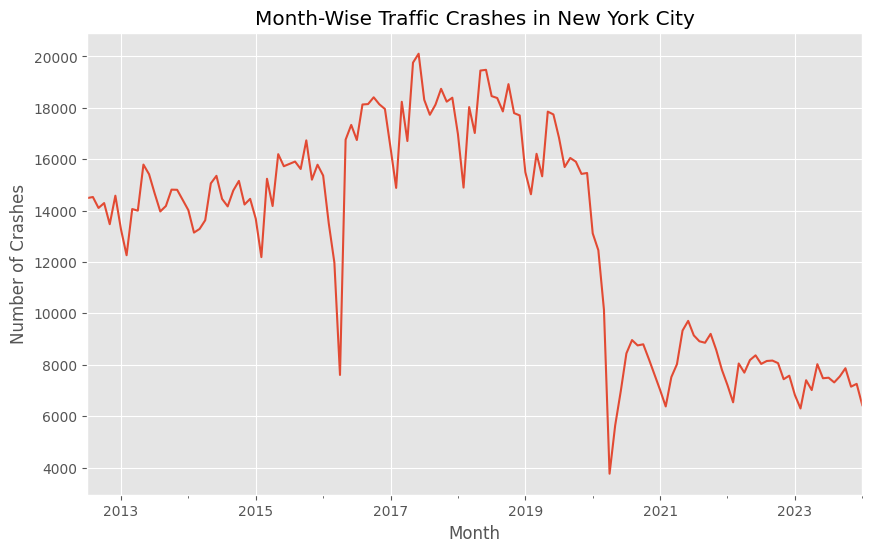

In [16]:
dfn2['CRASH DATE'] = pd.to_datetime(dfn2['CRASH DATE'])
dfn2.set_index('CRASH DATE', inplace=True)
monthly_crashes = dfn2.resample('M').size()
plt.figure(figsize=(10, 6))
monthly_crashes.plot(title='Month-Wise Traffic Crashes in New York City')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

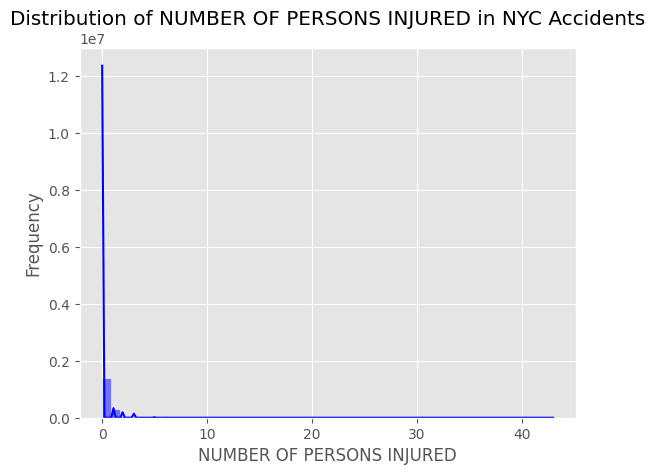

In [17]:
distn1=sns.histplot(x=dfn2['NUMBER OF PERSONS INJURED'], bins=50, kde=True, color='blue')
plt.xlabel('NUMBER OF PERSONS INJURED')
plt.ylabel('Frequency')
plt.title('Distribution of NUMBER OF PERSONS INJURED in NYC Accidents')
plt.show()

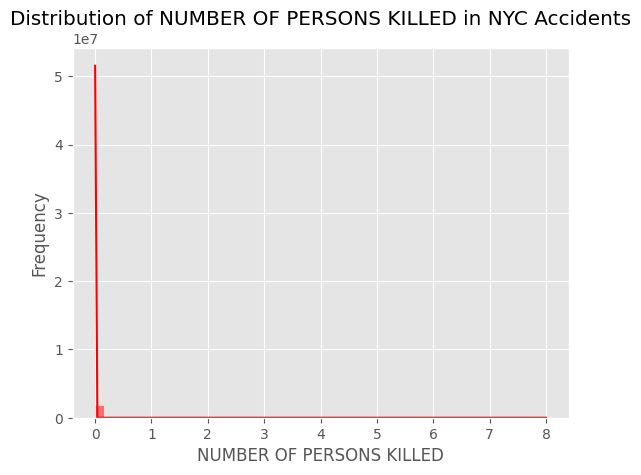

In [18]:
distn2=sns.histplot(x=dfn2['NUMBER OF PERSONS KILLED'], bins=50, kde=True, color='red')
plt.xlabel('NUMBER OF PERSONS KILLED')
plt.ylabel('Frequency')
plt.title('Distribution of NUMBER OF PERSONS KILLED in NYC Accidents')
plt.show()

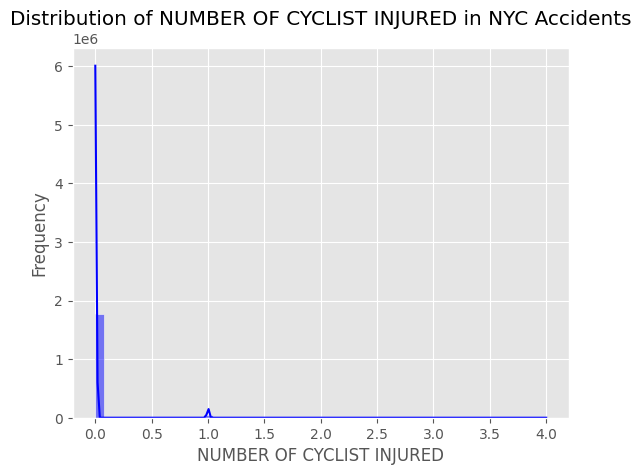

In [19]:
distn3=sns.histplot(x=dfn2['NUMBER OF CYCLIST INJURED'], bins=50, kde=True, color='blue')
plt.xlabel('NUMBER OF CYCLIST INJURED')
plt.ylabel('Frequency')
plt.title('Distribution of NUMBER OF CYCLIST INJURED in NYC Accidents')
plt.show()

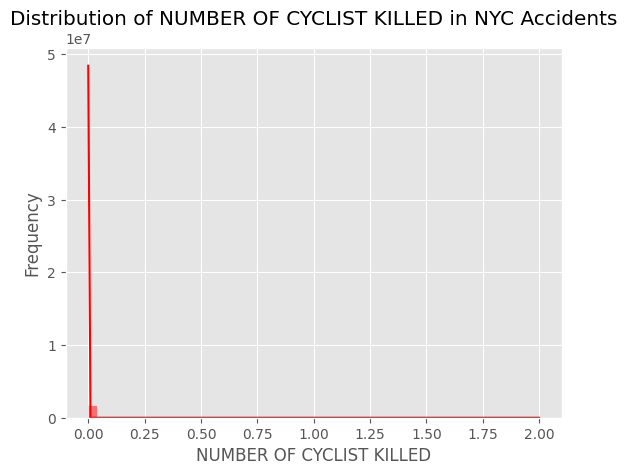

In [20]:
distn3=sns.histplot(x=dfn2['NUMBER OF CYCLIST KILLED'], bins=50, kde=True, color='red')
plt.xlabel('NUMBER OF CYCLIST KILLED')
plt.ylabel('Frequency')
plt.title('Distribution of NUMBER OF CYCLIST KILLED in NYC Accidents')
plt.show()

In [21]:
val_contf=dfn2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
val_contf

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       617932
Driver Inattention/Distraction    369677
Failure to Yield Right-of-Way     110198
Following Too Closely              94334
Backing Unsafely                   69394
                                   ...  
Cell Phone (hand-held)                66
80                                    62
Texting                               46
Listening/Using Headphones            21
1                                      5
Name: count, Length: 61, dtype: int64

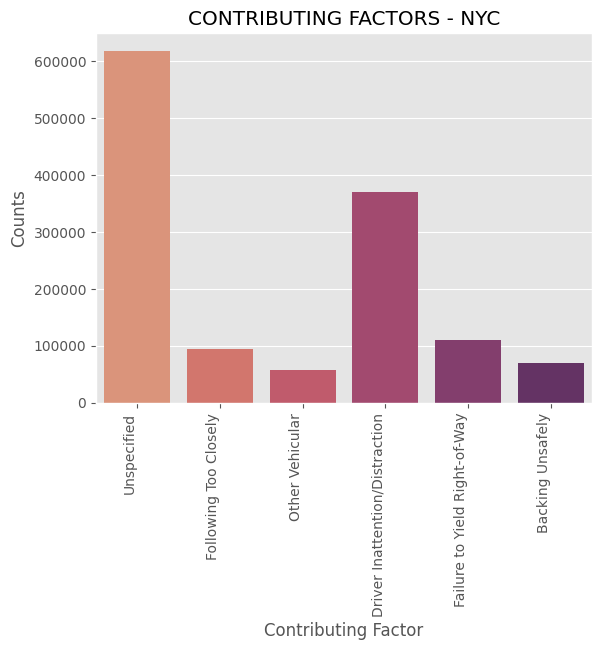

In [22]:
top_6_values = dfn2['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(6).index
fdf1 = dfn2[dfn2['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_6_values)]
count1=sns.countplot(x='CONTRIBUTING FACTOR VEHICLE 1', data=fdf1, palette='flare')
count1.set_xticklabels(count1.get_xticklabels(), rotation=90, ha="right")
plt.title('CONTRIBUTING FACTORS - NYC')
plt.xlabel('Contributing Factor')
plt.ylabel('Counts')
plt.show()

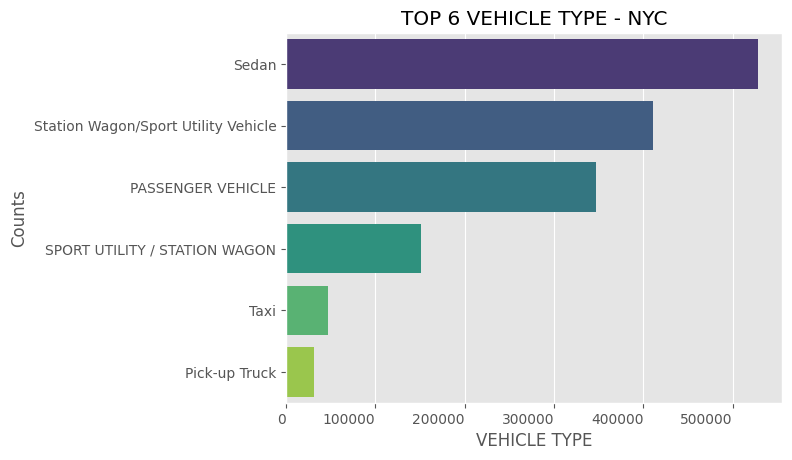

In [23]:
top_6_values2 = dfn2['VEHICLE TYPE CODE 1'].value_counts().head(6).index
fdf2 = dfn2[dfn2['VEHICLE TYPE CODE 1'].isin(top_6_values2)]
count2=sns.countplot(y='VEHICLE TYPE CODE 1', data=fdf2, order=top_6_values2, palette='viridis')
count2.set_xticklabels(count2.get_xticklabels(), ha="right")
plt.title('TOP 6 VEHICLE TYPE - NYC')
plt.xlabel('VEHICLE TYPE')
plt.ylabel('Counts')
plt.show()

In [24]:
dfl2=df_la.copy()
dfl2.copy()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"
5,190411883,07/06/2019,07/06/2019,950,4,Hollenbeck,423,997,TRAFFIC COLLISION,3101 3401 3701 3003 3025 3029,60.0,M,H,101.0,STREET,MAIN,JOHNSTON,"(34.066, -118.2102)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603249,230713012,08/08/2023,08/06/2023,2100,7,Wilshire,784,997,TRAFFIC COLLISION,3004 3024 3029 3035 3037 3101 3401 3701 4027,20.0,F,W,101.0,STREET,LA BREA AV,23RD ST,"(34.0359, -118.3495)"
603250,230813009,08/08/2023,08/03/2023,2230,8,West LA,889,997,TRAFFIC COLLISION,3003 3026 3029 3035 3036 3101 3401 3701 4008,31.0,M,H,101.0,STREET,LA CIENEGA BL,GUTHRIE AV,"(34.0403, -118.377)"
603251,231513187,08/06/2023,08/06/2023,1645,15,N Hollywood,1521,997,TRAFFIC COLLISION,3004 3026 4015 3029 3036 3101,43.0,F,O,101.0,STREET,VANOWEN ST,FULTON AV,"(34.194, -118.4225)"
603252,231610826,08/06/2023,08/06/2023,1845,16,Foothill,1669,997,TRAFFIC COLLISION,3004 3028 4026 3034 3037 3101,50.0,M,H,101.0,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"(34.234, -118.2703)"


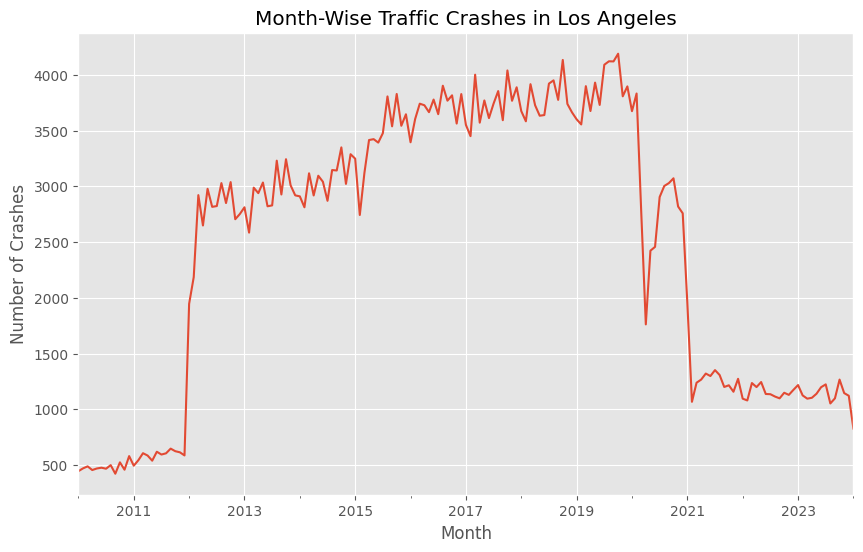

In [25]:
dfl2['Date Occurred'] = pd.to_datetime(dfl2['Date Occurred'])
dfl2.set_index('Date Occurred', inplace=True)
monthly_crashes1 = dfl2.resample('M').size()
plt.figure(figsize=(10, 6))
monthly_crashes1.plot(title='Month-Wise Traffic Crashes in Los Angeles')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

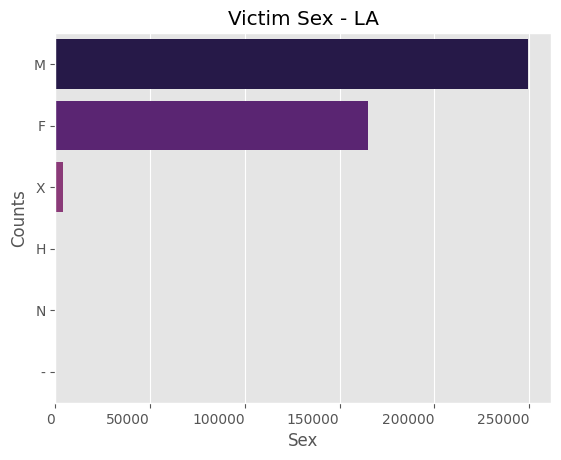

In [26]:
top_6_values3 = dfl2['Victim Sex'].value_counts().index
fdf3 = dfl2[dfl2['Victim Sex'].isin(top_6_values3)]
countl1=sns.countplot(y='Victim Sex', data=fdf3, palette='magma')
countl1.set_xticklabels(countl1.get_xticklabels(), ha="right")
plt.title('Victim Sex - LA')
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.show()

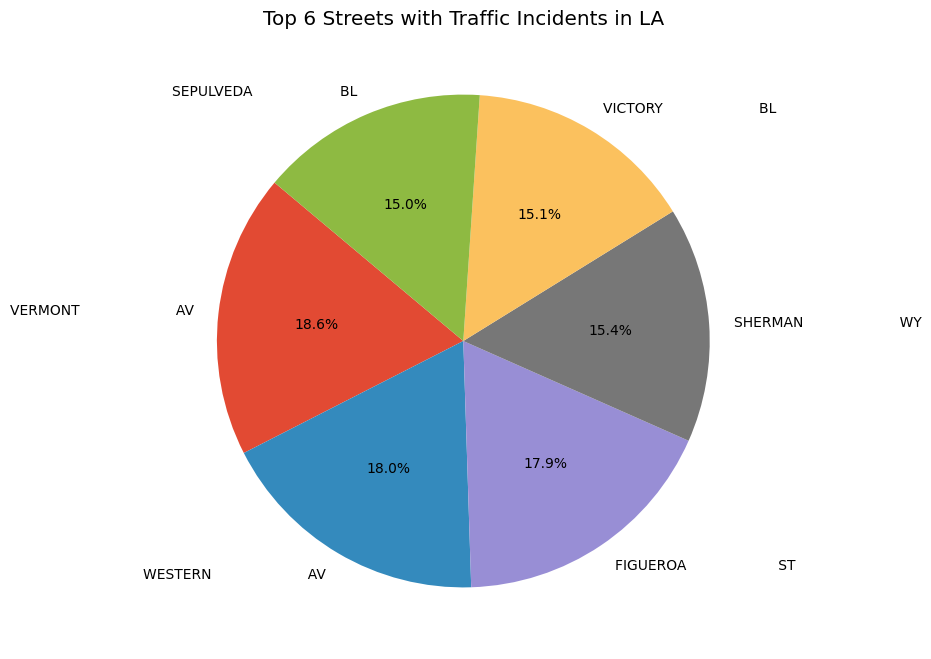

In [27]:
top_6 = dfl2['Cross Street'].value_counts().head(6)
plt.figure(figsize=(8, 8))  
plt.pie(top_6, labels=top_6.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 6 Streets with Traffic Incidents in LA')
plt.show()

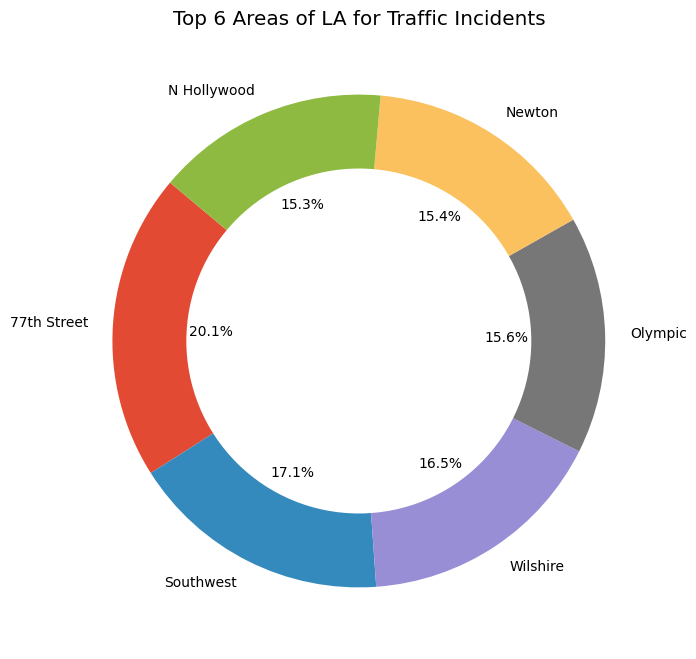

In [28]:
top_6l2 = dfl2['Area Name'].value_counts().head(6)
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top_6l2, labels=top_6l2.index, autopct='%1.1f%%', startangle=140)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()  
fig.gca().add_artist(centre_circle)

plt.title('Top 6 Areas of LA for Traffic Incidents')
plt.show()

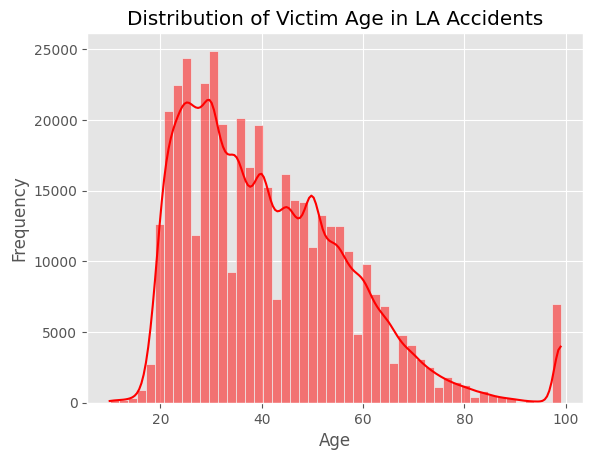

In [29]:
distl1=sns.histplot(x=dfl2['Victim Age'], bins=50, kde=True, color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Age in LA Accidents')
plt.show()

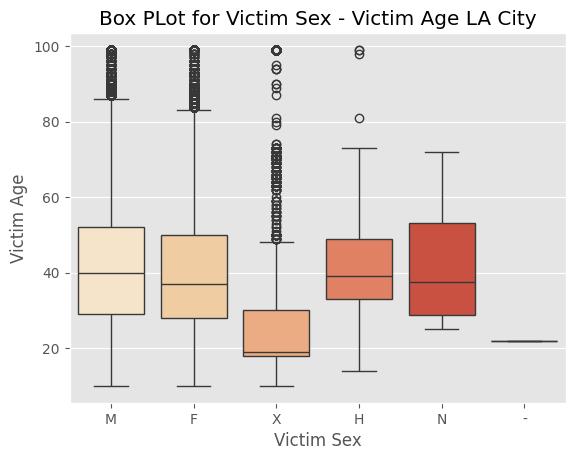

In [32]:
bxpl1=sns.boxplot(x='Victim Sex', y='Victim Age', data=dfl2, palette='OrRd')
plt.title('Box PLot for Victim Sex - Victim Age LA City')
plt.show()